In [1]:
%matplotlib agg

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

plt.rcParams.update({'font.size': 8})

## Simple version

Encode amino acid position using sine functions

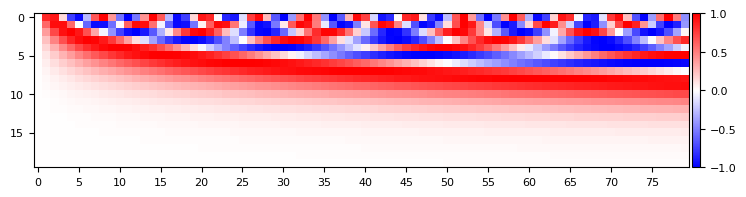

In [2]:
def make_encoding(dim_encoding, len_sequence, base):
    # pos, idx have both shape (dim_encoding, len_sequence)
    sequence_pos, encoding_idx = np.meshgrid(np.arange(len_sequence), np.arange(dim_encoding))
    return np.sin(sequence_pos / (base ** (encoding_idx / dim_encoding)))

dim_encoding = 20
len_sequence = 80
base = 10_000

fig, ax = plt.subplots(1,1, figsize=(10, 2))
emb = make_encoding(dim_encoding, len_sequence, base)
img = ax.imshow(emb, aspect='auto', cmap='bwr', vmin=-1, vmax=+1)
ax.set_yticks(range(0, dim_encoding, 5))
ax.set_xticks(range(0, len_sequence, 5))
fig.colorbar(img, ax=ax, pad=0.005)
display(fig)
plt.close(fig)

## Version from "Attention is all you need"

In [3]:
def make_encoding(dim_encoding, len_sequence, base):
    # pos, idx have both shape (dim_encoding, len_sequence)
    sequence_pos, encoding_idx = np.meshgrid(np.arange(len_sequence), np.arange(dim_encoding))
    
    emb = np.empty((dim_encoding, len_sequence))
    emb[0::2] = np.sin(sequence_pos[0::2, :] / (base ** (2 * encoding_idx[0::2, :] / dim_encoding)))
    emb[1::2] = np.cos(sequence_pos[1::2, :] / (base ** (2 * encoding_idx[1::2, :] / dim_encoding)))
    
    return emb

The encoding size has just an effect on resolution, but the ability to distinguish two positions at a given distance remains the same.

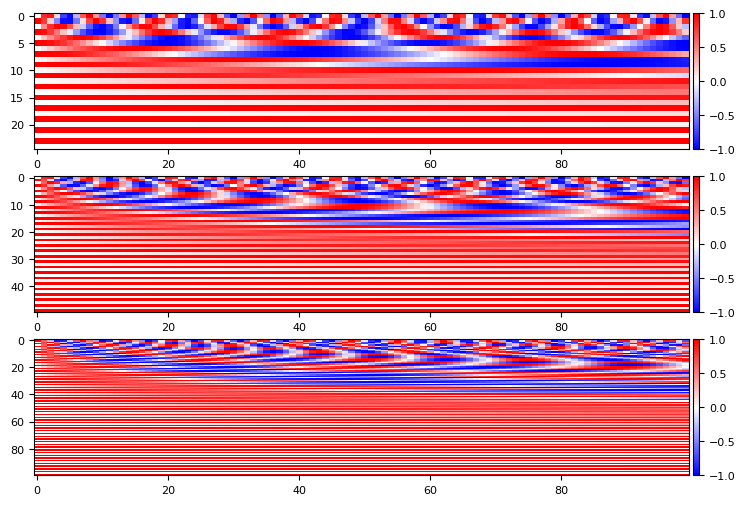

In [4]:
len_sequence = 100
base = 100
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

for ax, dim_encoding in zip(axes, [25, 50, 100]):
    emb = make_encoding(dim_encoding, len_sequence, base)
    img = ax.imshow(emb, aspect='auto', cmap='bwr', vmin=-1, vmax=+1)
    ax.set_yticks(range(0, dim_encoding, dim_encoding // 5))
    ax.set_xticks(range(0, len_sequence, len_sequence // 5))
    fig.colorbar(img, ax=ax, pad=0.005)

display(fig)
plt.close(fig)

Changing the base changes the max distance at which two positions can be distinguished.

If the last dimension of the encoding, i.e. the one with the lowest frequency, is almost constant across the whole sequence, then it's useless. It might become useful, however, for longer sequences.

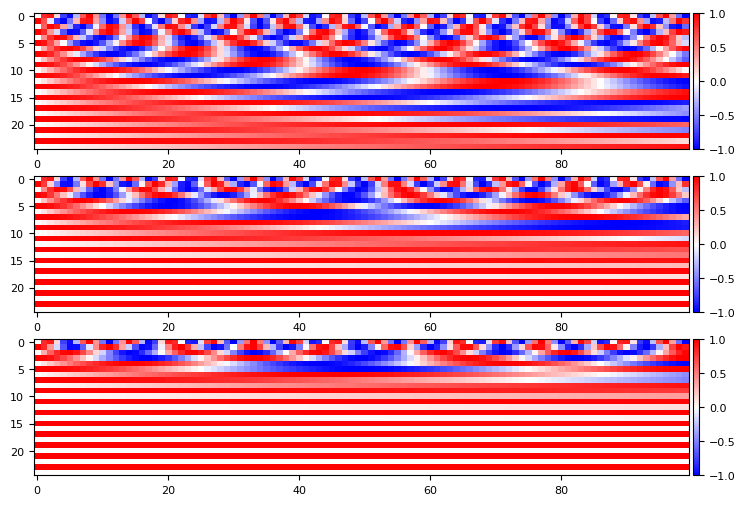

In [5]:
dim_encoding = 25
len_sequence = 100
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

for ax, base in zip(axes, [10, 100, 1000]):
    emb = make_encoding(dim_encoding, len_sequence, base)
    img = ax.imshow(emb, aspect='auto', cmap='bwr', vmin=-1, vmax=+1)
    ax.set_yticks(range(0, dim_encoding, dim_encoding // 5))
    ax.set_xticks(range(0, len_sequence, len_sequence // 5))
    fig.colorbar(img, ax=ax, pad=0.005)

display(fig)
plt.close(fig)

With `len(sequence) < 500`, the encoding dimensions past the 15th are almost useless, the sequence length needs to be over 5000 them be useful.

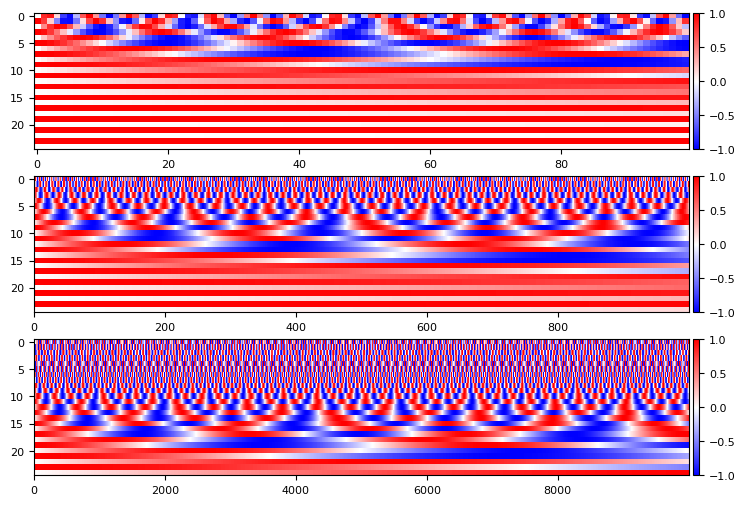

In [6]:
dim_encoding = 25
base = 100
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

for ax, len_sequence in zip(axes, [100, 1000, 10_000]):
    emb = make_encoding(dim_encoding, len_sequence, base)
    img = ax.imshow(emb, aspect='auto', cmap='bwr', vmin=-1, vmax=+1)
    ax.set_yticks(range(0, dim_encoding, dim_encoding // 5))
    ax.set_xticks(range(0, len_sequence, len_sequence // 5))
    fig.colorbar(img, ax=ax, pad=0.005)

display(fig)
plt.close(fig)

Max sequence length for the datasets we consider:

In [7]:
lengths = ! grep max_length ../data/CASP*/dataset_stats.yaml
for line in lengths:
    print(line.split()[1], line.split()[0].split('/')[2])

739 CASP10
739 CASP10_stage1
739 CASP10_stage2
669 CASP11
669 CASP11_stage1
669 CASP11_stage2
670 CASP12
670 CASP12_stage1
670 CASP12_stage2
523 CASP5
499 CASP6
530 CASP7
685 CASP8
887 CASP9
